<a href="https://colab.research.google.com/github/unipd-human-data/env-soundnet/blob/main/TAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creazione Dataset

In [1]:
!pip install librosa pydub torchaudio snntorch tqdm matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
#Libreria standard
import os                               #file e cartelle
import numpy as np                      #operazioni matriciali, audio e spet sono matrici
import pandas as pd                     #leggere e gestire tabelle come esc50.csv
import matplotlib.pyplot as plt         #grafici std
import seaborn as sns                   #grafici statistici più belli

#Audio
import librosa                          #per audio in python, calcola features ecc
import librosa.display                  #visualizzare spettrogrammi
import torchaudio                       #audio di pytorch, usata per pipeline integrata con PyTorch
import torchaudio.transforms as T       #Moduli per convertire audio in MelSpectogram o trasfromazioni
from pydub import AudioSegment          #gestire audio a livello più "umano"

#Deep learning e SNN
import torch                            #costruzioni reti neurali
import snntorch as snn                  #estensione pytorch per SNN
from snntorch import spikegen           #converte input in spike train
from snntorch import spikeplot as splt
import tensorflow as tf                 #costruzione e training di modelli di ml e dl
from sklearn.model_selection import train_test_split

#Altri
from tqdm import tqdm                   #aggiungere barre di progresso ai loop, quanto manca al caricamento audio


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = np.load('/content/drive/MyDrive/HumanData/esc10_data_aug.npz')
X = data['X']
y = data['y']

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))

Visualizzo uno spettrogramma

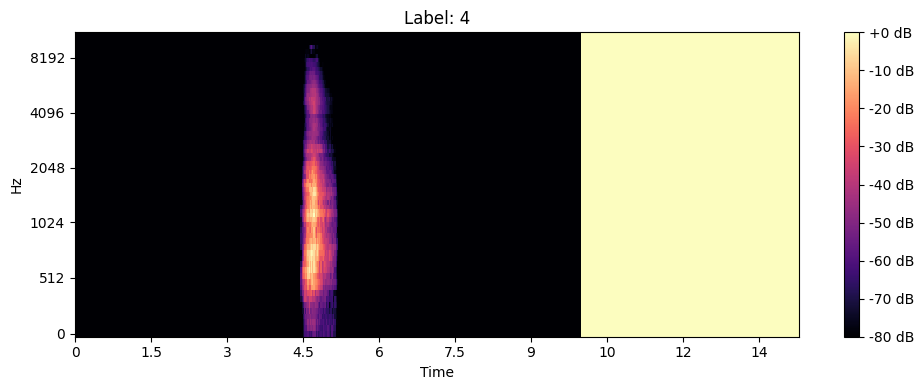

In [6]:
for mel, label in dataset.take(3):
    mel = mel.numpy()
    label = label.numpy()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel, x_axis='time', y_axis='mel', cmap='magma')
plt.title(f"Label: {label}")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

# Divisione in set

70 - 15 - 15

In [7]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 42)

In [8]:
print(len(X_train), len(X_val), len(X_test))

1960 420 420


Creazione dei tre dataset

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [10]:
batch_size = 16

train_ds = train_ds.shuffle(buffer_size=len(X_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# DATA AUGMENTATION TAA